## Use the person detector of opencv to study detector sensitivity

First, we load some libraries:

In [19]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 300 # Make sure we see the images

Define two utility functions:

In [20]:
def inside(r, q):
    """
    Returns true if rectangle r = (x,y,w,h) is inside rectangle q.
    """
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh

def draw_detections(img, rects, thickness = 1):
    """
    Overlay the detection results (rectangles) on the image "img".
    """
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)


Initialize the OpenCV HOG (Histogram of oriented gradients) detector:

In [21]:
hog = cv2.HOGDescriptor()
detectorCoefficients = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector(detectorCoefficients)

Load test image and detect all humans in it:

In [25]:
filename = 'person1.jpg'    
img = cv2.imread(filename)

hitThreshold = 0

found, w = hog.detectMultiScale(img, 
                                winStride=(8,8), 
                                padding=(32,32), 
                                scale=1.05,
                                hitThreshold = hitThreshold)

Remove overlapping detections:

In [26]:
found_filtered = []
for ri, r in enumerate(found):
    for qi, q in enumerate(found):
        if ri != qi and inside(r, q):
            break
    else:
        found_filtered.append(r)

print('%d (%d) persons found' % (len(found_filtered), len(found)))

1 (1) persons found


Draw what we found:

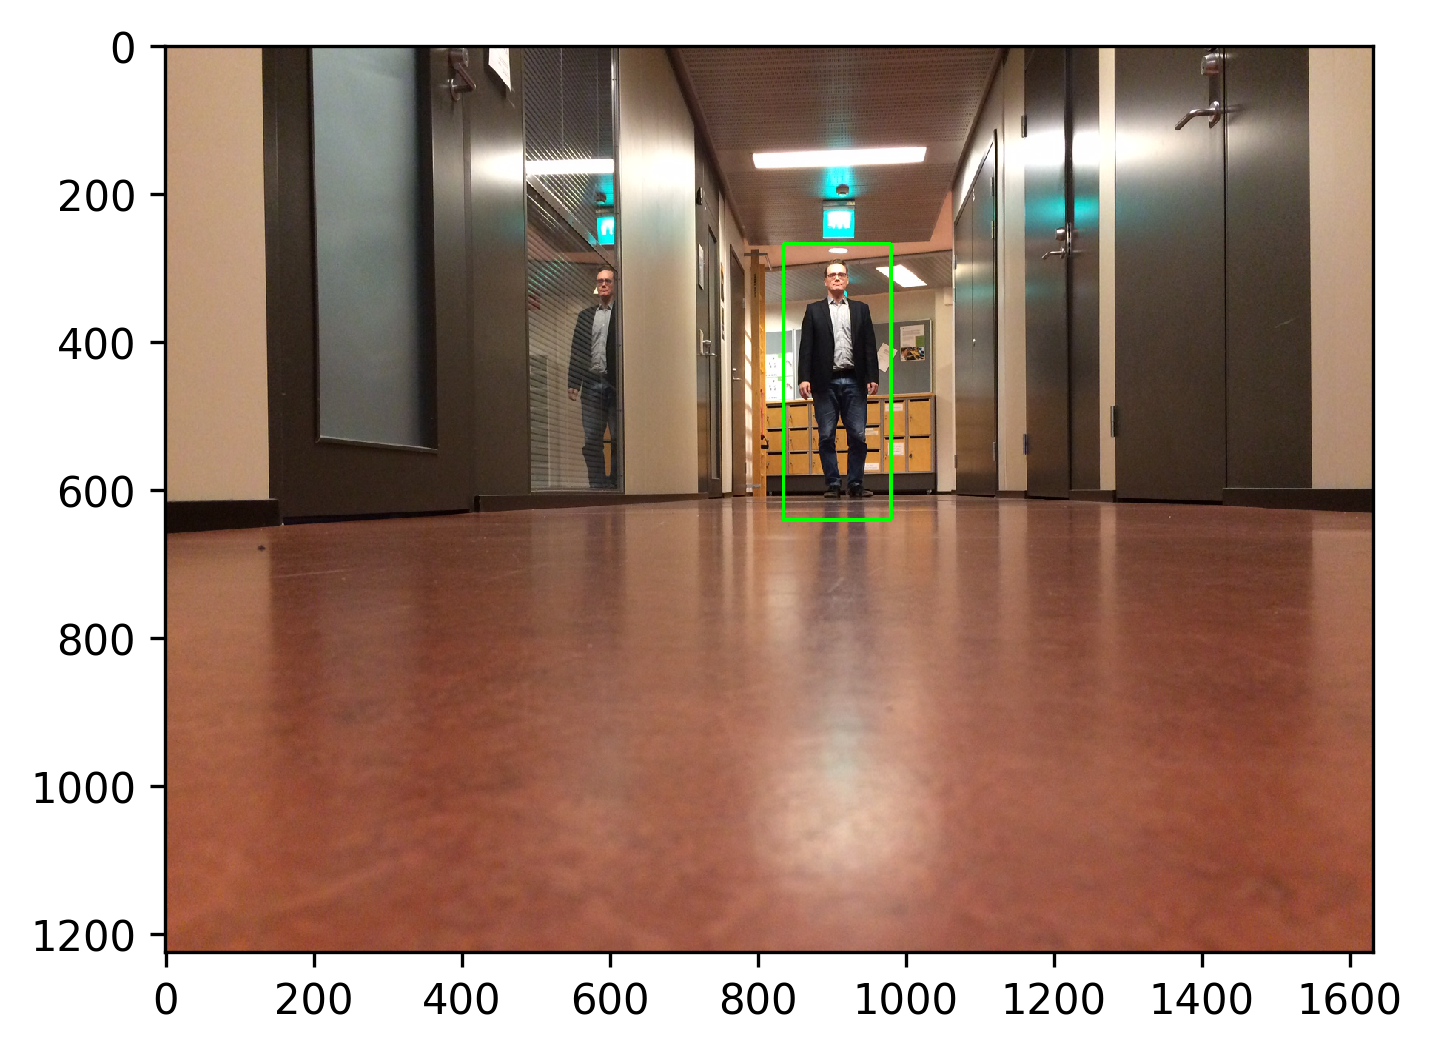

In [27]:
draw_detections(img, found_filtered, 3)
plt.imshow(img[..., ::-1])
plt.show()